# Environment setup

In [2]:
# Environment requirements
!pip3 install kagglehub
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install --upgrade matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [ ]:
# Load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqi786/remote-work-and-mental-health")

df = pd.read_csv(f"{path}/Impact_of_Remote_Work_on_Mental_Health.csv")

100%|██████████| 93.0k/93.0k [00:00<00:00, 26.5MB/s]

Extracting files...


# Milestone 2

In [ ]:
# Data exploration
# evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions

## Number of observations:
5000 observations

## Missing data
We do not have any missing data in our dataset. There are "null values" in the features Physical_Activity and Mental_Health_Condition but those are to be interpreted as lack of physical activity and healthy mental health, respectively.

## Column descriptions:

We noticed that our dataset has both numerical values and categorical values. We then noticed we have ordinal and nominal categorical features, which are listed below.

### Numerical columns:
- Age
- Years_Of_Experience
- Hours_Worked_Per_Week
- Number_of_Virtual_Meetings

## Categorical columns:

### Ordinal:
- Wolf_Life_Balance_Rating (rating from 1-5)
- Social_Isolation_Rating (rating from 1-5)
- Company_Support_for_Remote_Work (rating from 1-5)
- Stress_Level (low, medium, high)
- Sleep_Quality (poor, average, good)
- Physical_Activity (none, daily, weekly)

### Nominal:
- Gender
- Job_Role
- Industry
- Work_Location
- Access_to_Mental_Health_Resources
- Productivity_Change
- Satisfaction_with_Remote_Work
- Mental_Health_Condition
- Region

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Below are the quartiles, mean, std, and min/max for our dataset for each feature

In [ ]:
df.describe().round(2)

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,41.0,17.81,39.61,7.56,2.98,2.99,3.01
std,11.3,10.02,11.86,4.64,1.41,1.39,1.40
min,22.0,1.00,20.00,0.00,1.00,1.00,1.00
25%,31.0,9.00,29.00,4.00,2.00,2.00,2.00
50%,41.0,18.00,40.00,8.00,3.00,3.00,3.00
75%,51.0,26.00,50.00,12.00,4.00,4.00,4.00
max,60.0,35.00,60.00,15.00,5.00,5.00,5.00


## Graph data to see distribution shape

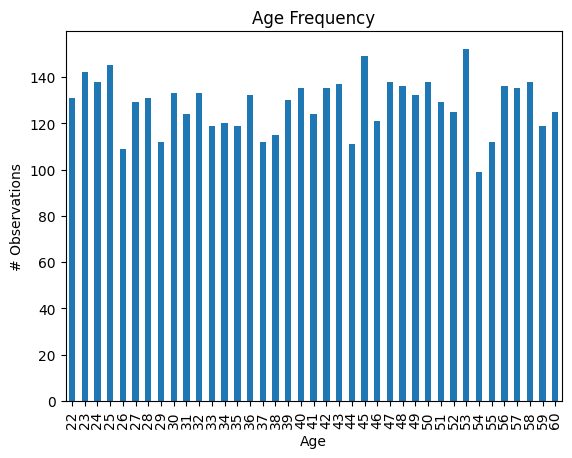

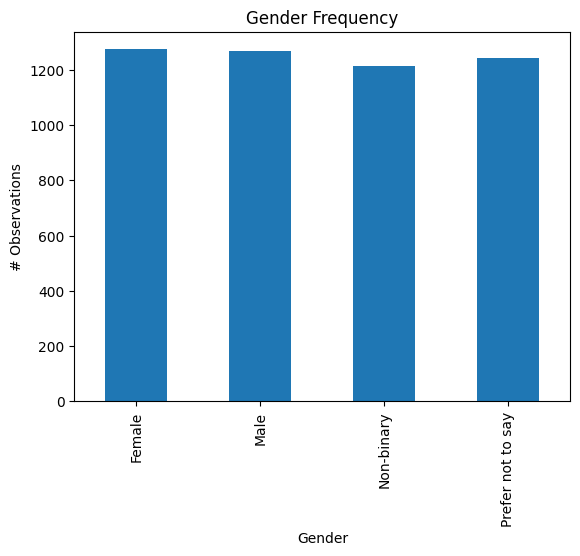

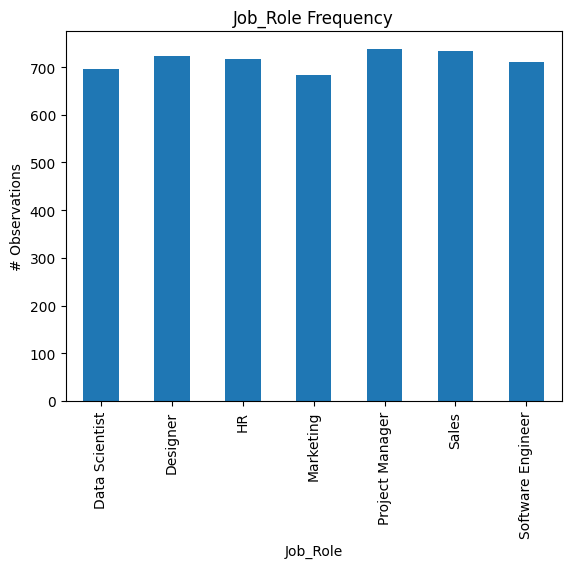

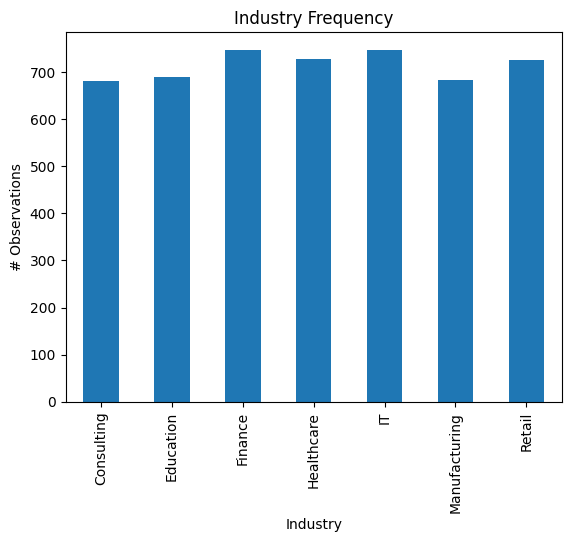

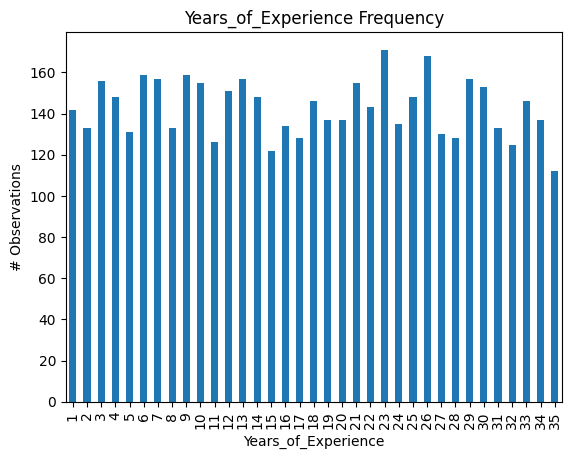

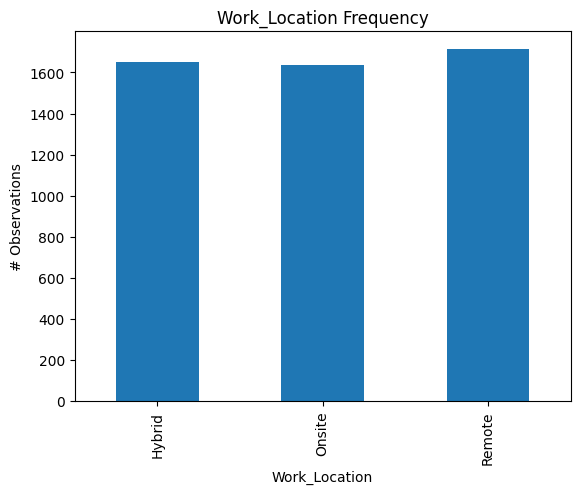

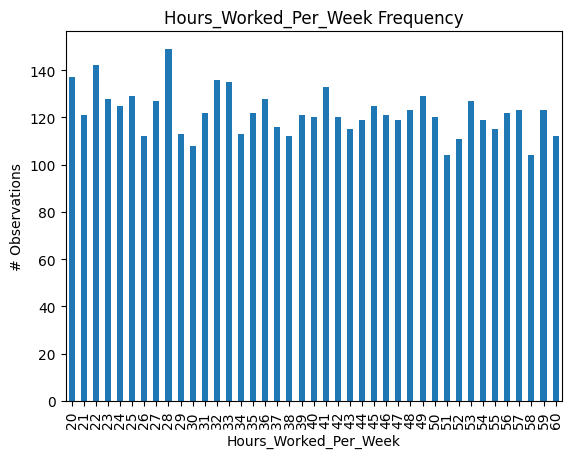

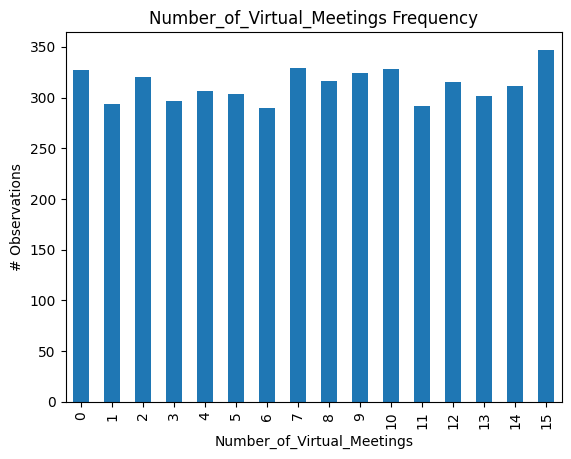

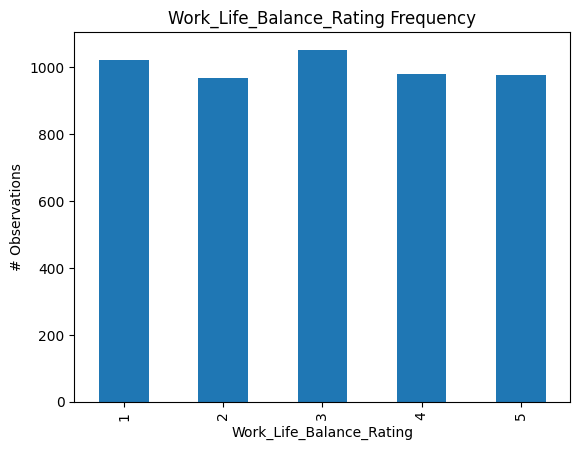

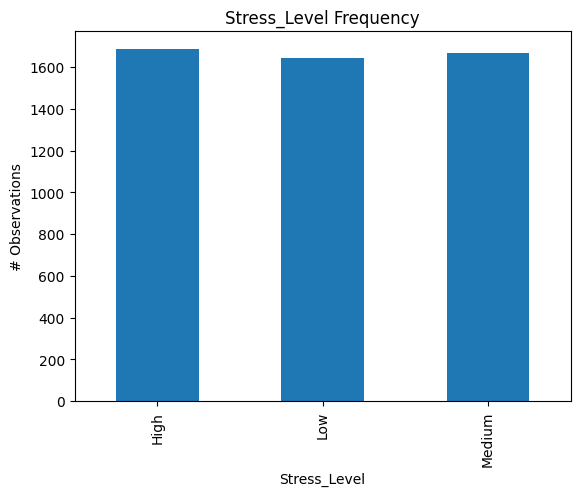

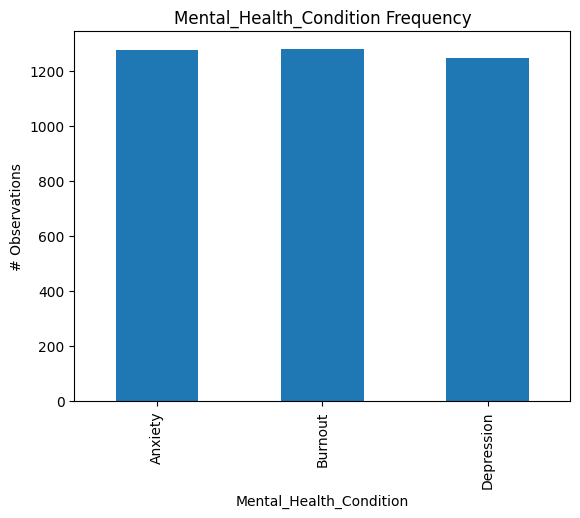

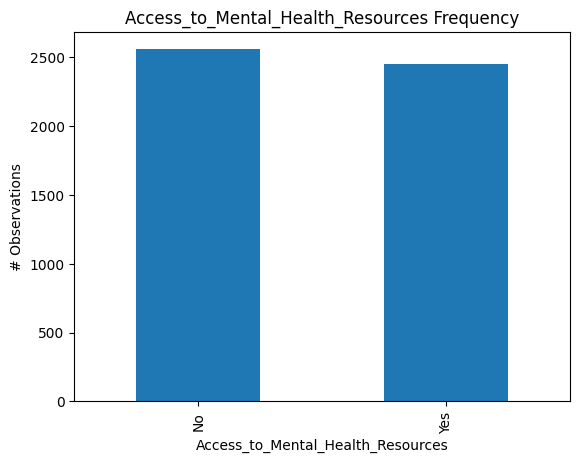

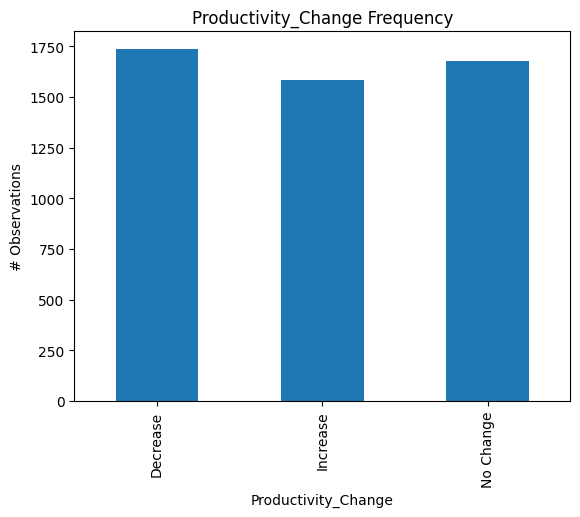

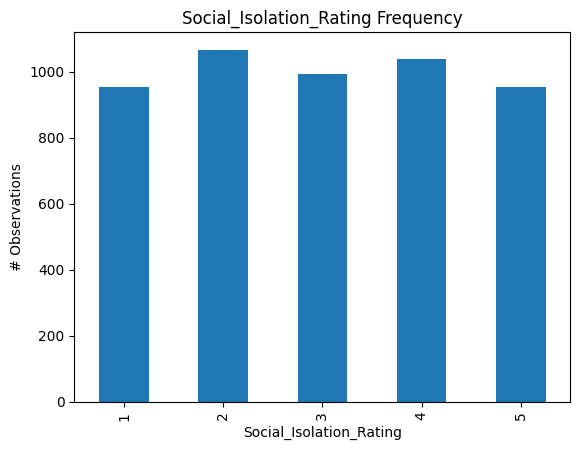

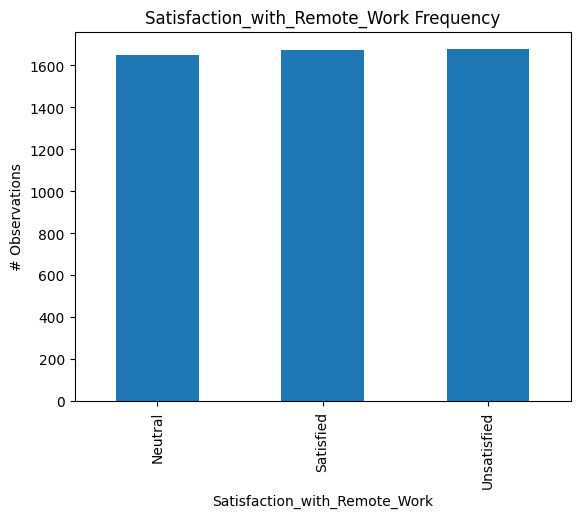

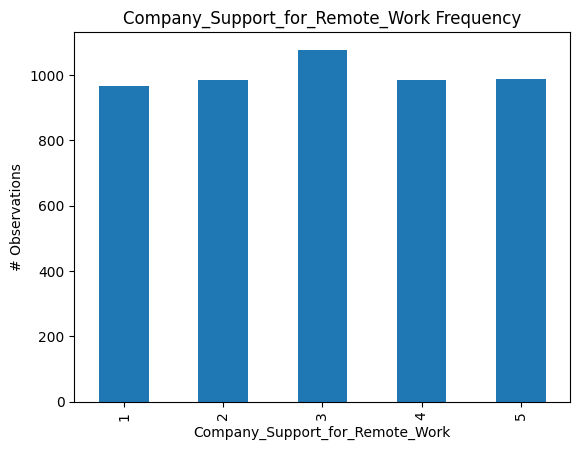

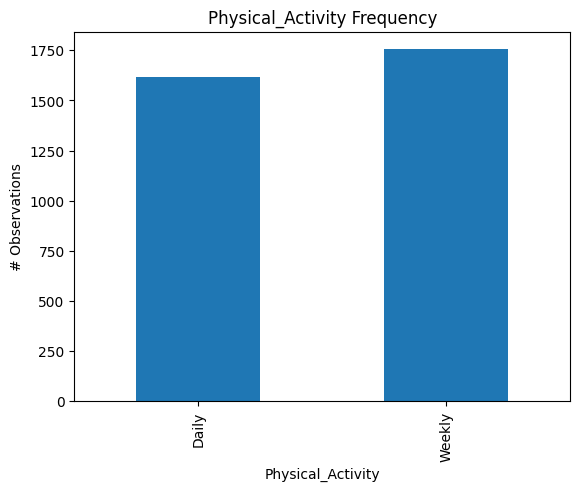

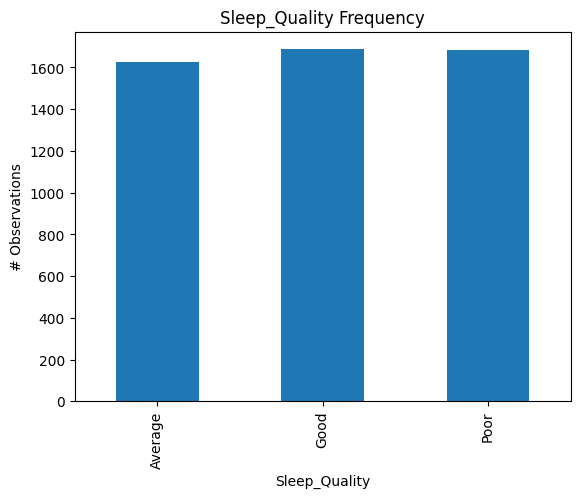

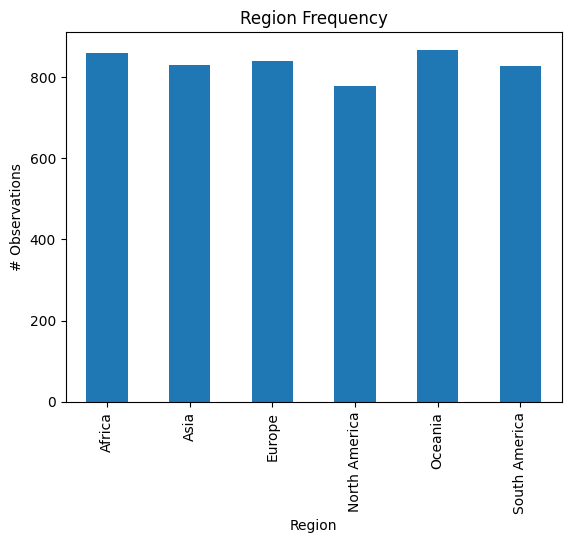

In [ ]:
for column in df.columns:
    if column in ['Employee_ID']:
      continue
    counts = df[column].value_counts(sort=False)
    counts = counts.sort_index()

    plot = counts.plot(kind='bar')
    plot.set_title(f'{column} Frequency')
    plot.set_xlabel(column)
    plot.set_ylabel('# Observations')
    plt.show()

In [ ]:
# Plot data (tabular, so scatters)

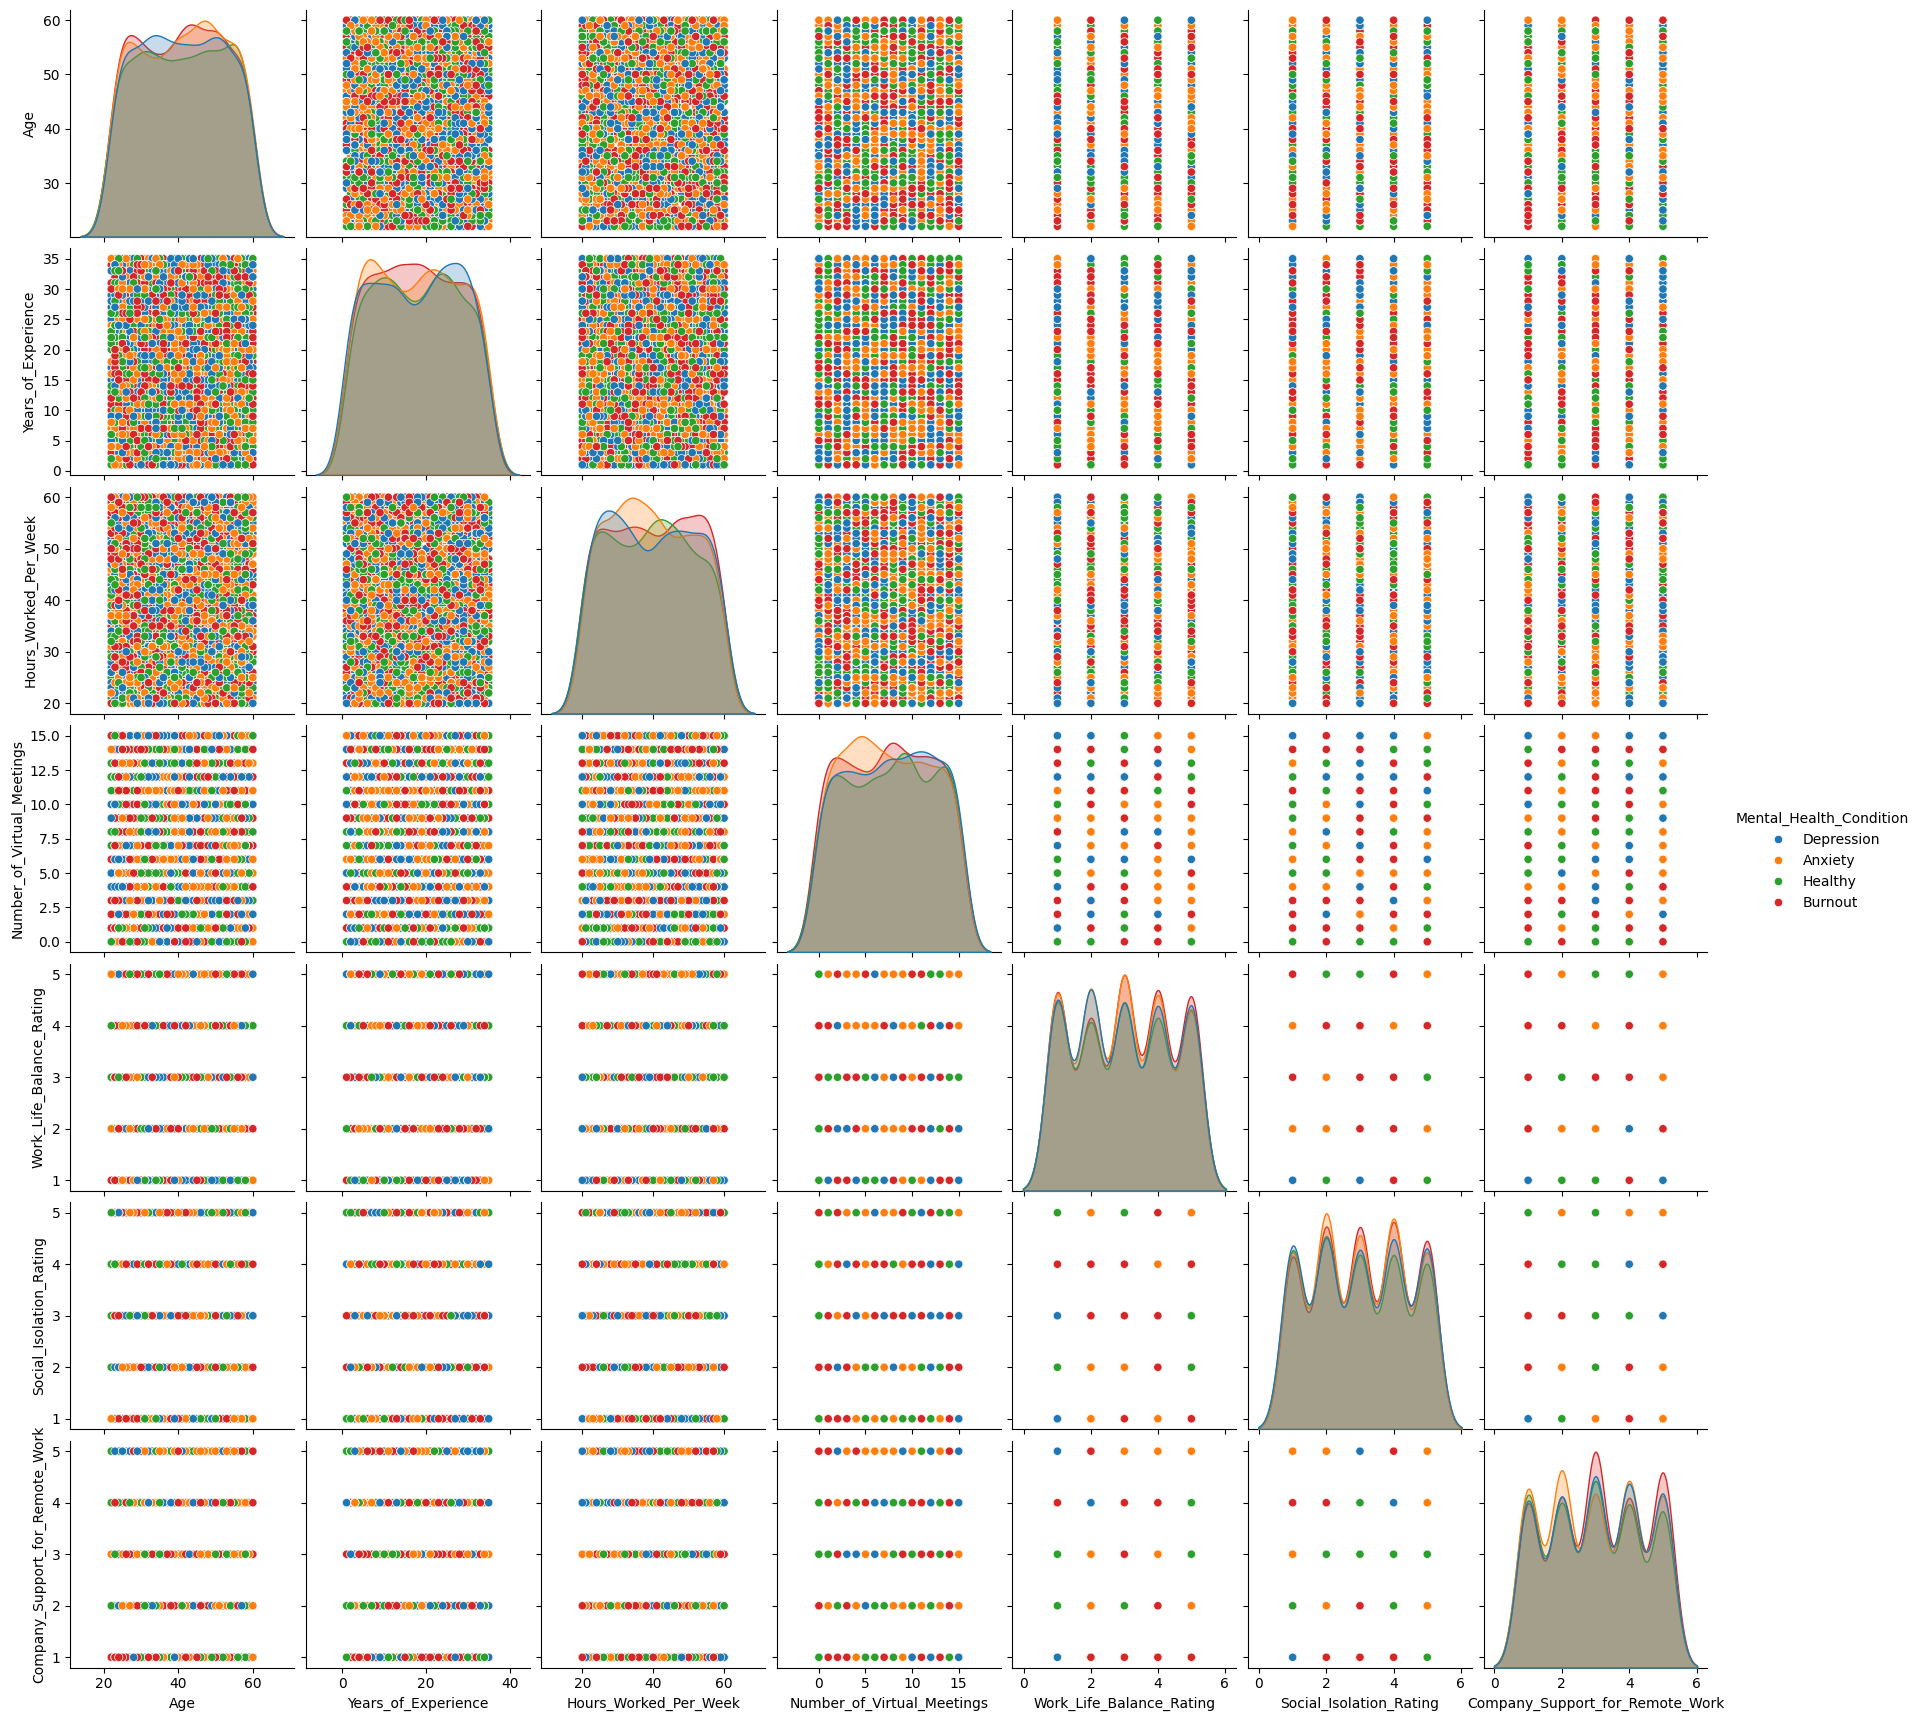

In [ ]:
df_replaced = df.copy()
df_replaced['Mental_Health_Condition'] = df_replaced['Mental_Health_Condition'].fillna("Healthy")
sns.pairplot(df_replaced, hue='Mental_Health_Condition', diag_kind='kde')

# Milestone 3

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Preprocess data

data = df.copy()

# Get rid of where years of experience is > age since we know this is impossible.
data = data[data['Years_of_Experience'] < data['Age']]

# Replace null values
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna("Healthy")
data['Physical_Activity'] = data['Physical_Activity'].fillna("No Exercise")
data = data.drop('Employee_ID', axis=1)

# one hot encode nominal values
nominal_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Region']
data = pd.get_dummies(data, columns=nominal_columns)

# label encode
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].map({'Anxiety': 1, 'Burnout': 1, 'Depression': 1, 'Healthy': 0})

# label encode ordinal values
data['Physical_Activity'] = data['Physical_Activity'].map({'No Exercise': 0, 'Weekly': 1, 'Daily': 2})
data['Stress_Level'] = data['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Sleep_Quality'] = data['Sleep_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Mental_Health_Condition'], axis=1), data['Mental_Health_Condition'], test_size=0.2, random_state=21)

# Standardize
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

X_train['Years_of_Experience'] = scaler.fit_transform(X_train[['Years_of_Experience']])
X_test['Years_of_Experience'] = scaler.transform(X_test[['Years_of_Experience']])

X_train['Hours_Worked_Per_Week'] = scaler.fit_transform(X_train[['Hours_Worked_Per_Week']])
X_test['Hours_Worked_Per_Week'] = scaler.transform(X_test[['Hours_Worked_Per_Week']])

X_train['Number_of_Virtual_Meetings'] = scaler.fit_transform(X_train[['Number_of_Virtual_Meetings']])
X_test['Number_of_Virtual_Meetings'] = scaler.transform(X_test[['Number_of_Virtual_Meetings']])

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
yhat_test = svm.predict(X_test)
yhat_train = svm.predict(X_train)

#Report the testing results of both train and test using classification report
print("Classification report for test data:")
print(classification_report(y_test, yhat_test, digits=3))

print("Classification report for train data:")
print(classification_report(y_train, yhat_train, digits=3))

Classification report for test data:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       217
           1      0.766     1.000     0.867       709

    accuracy                          0.766       926
   macro avg      0.383     0.500     0.434       926
weighted avg      0.586     0.766     0.664       926

Classification report for train data:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       883
           1      0.762     1.000     0.865      2820

    accuracy                          0.762      3703
   macro avg      0.381     0.500     0.432      3703
weighted avg      0.580     0.762     0.658      3703



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [52]:
# Please make sure preprocessing is complete and your first model has been trained. If you are doing supervised learning include example ground truth and predictions for train, validation and test.

print("First 5 ground truths and predictions for test set:")
display(y_test.head())
display(yhat_test[0:5])

print("First 5 ground truths and predictions for train set:")
display(y_train.head())
display(yhat_train[0:5])

First 5 ground truths and predictions for test set:


,Mental_Health_Condition
630,1
270,1
3363,1
1911,1
3822,1


array([1, 1, 1, 1, 1])

First 5 ground truths and predictions for train set:


,Mental_Health_Condition
1651,1
4148,1
1941,1
1634,1
4408,0


array([1, 1, 1, 1, 1])